### 제안 3: 거래 유형별 고객 행동 분석
- 문제 정의:
   + 거래 유형(TransactionType)과 고객의 위치(Location)에 따라 고객의 행동 패턴을 분석합니다.

- 목표:
   + 지역별 거래 유형 비율 비교
   + 고객이 선호하는 거래 유형과 시간대 분석
   + 환불(refund) 요청 비율 및 환불 금액 분포 확인
  
- 배경 : 고객 행동 패턴을 이해하면, 특정 지역에서 선호되는 상품이나 서비스를 파악하고 환불 정책 개선에 활용할 수 있습니다.

- 인사이트 : 지역별 거래 유형 비율 비교 -> 별 차이 없다.

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
df_cfd = pd.read_csv('../../datasets/credit_card_fraud_dataset.csv')
df_cfd.head(3)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0


In [59]:
df_cfd.info(), df_cfd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


(None,
        TransactionID         Amount     MerchantID        IsFraud
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean    50000.500000    2497.092666     501.676070       0.010000
 std     28867.657797    1442.415999     288.715868       0.099499
 min         1.000000       1.050000       1.000000       0.000000
 25%     25000.750000    1247.955000     252.000000       0.000000
 50%     50000.500000    2496.500000     503.000000       0.000000
 75%     75000.250000    3743.592500     753.000000       0.000000
 max    100000.000000    4999.770000    1000.000000       1.000000)

#### 지역별 거래 유형 비율 비교

In [60]:
df_cfd['Location'].unique() # 지역 정보

array(['San Antonio', 'Dallas', 'New York', 'Philadelphia', 'Phoenix',
       'Chicago', 'San Jose', 'San Diego', 'Houston', 'Los Angeles'],
      dtype=object)

In [61]:
df_cfd['TransactionType'].unique()

array(['refund', 'purchase'], dtype=object)

In [62]:
df_cfd['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

In [63]:
df_cfd['TransactionType'].value_counts()

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64

In [64]:
df_cfd['Location'].describe()

count      100000
unique         10
top       Chicago
freq        10193
Name: Location, dtype: object

In [65]:
df_cfd['TransactionType'].describe()

count     100000
unique         2
top       refund
freq       50131
Name: TransactionType, dtype: object

In [66]:
# 위치: 거래의 지리적 위치로, 지역별 사기 동향을 쉽게 분석할 수 있습니다. 여기에 왜 거래량이 들어있는지 아직도 의문?
# 어떻게 매칭시켜 만들어야 할지?
# 매칭을 시키는게 아닌 단순 표현이 맞는 방향일지?
# 결과가 너무 다 비슷 비슷함

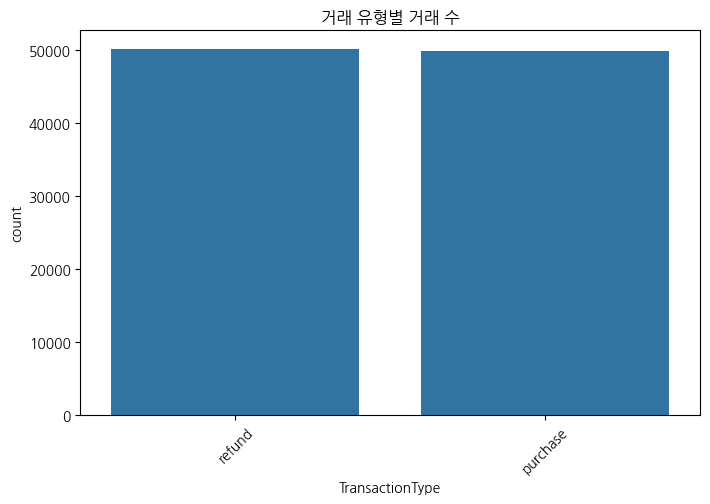

In [67]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_cfd, x = 'TransactionType', order = df_cfd['TransactionType'].value_counts().index)
plt.title('거래 유형별 거래 수')
plt.xticks(rotation=45)
plt.show()

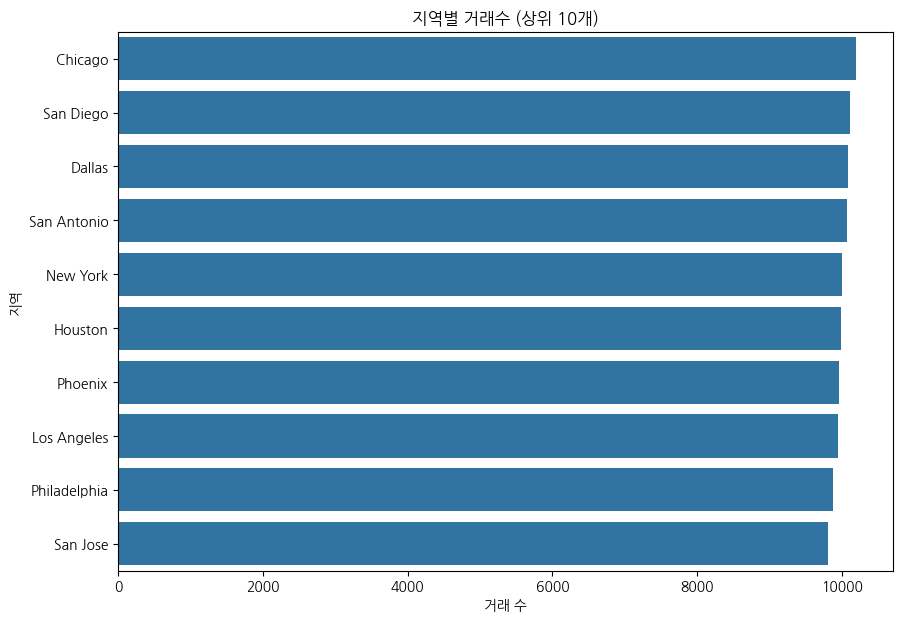

In [68]:
plt.figure(figsize = (10,7))
sns.countplot(data = df_cfd, y='Location', order=df_cfd['Location'].value_counts().index[:10])
plt.title('지역별 거래수 (상위 10개)')
plt.xlabel('거래 수')
plt.ylabel('지역')
plt.show()

In [69]:
# 두개 합치기
locations_info = ['San Antonio', 'Dallas', 'New York', 'Philadelphia', 'Phoenix',
       'Chicago', 'San Jose', 'San Diego', 'Houston', 'Los Angeles']
fillter_data = df_cfd[df_cfd['Location'].isin(locations_info)]

pivot_data = fillter_data.pivot_table(index='Location', columns='TransactionType', aggfunc = 'size', fill_value = 0 )

<function matplotlib.pyplot.show(close=None, block=None)>

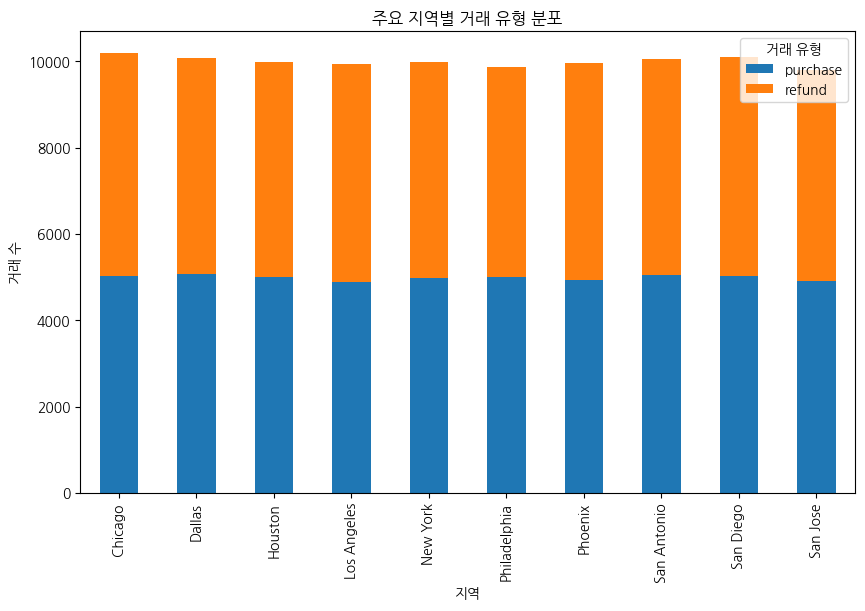

In [70]:
pivot_data.plot(kind='bar', stacked=True, figsize = (10,6))
plt.title('주요 지역별 거래 유형 분포')
plt.xlabel('지역')
plt.ylabel('거래 수')
plt.legend(title='거래 유형')
plt.show
